In [1]:
#LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
#LOAD TE DATASET
df=pd.read_csv("C:\env\Loan_approval_data.csv")
print(df.head())

  customer_id  age occupation_status  years_employed  annual_income  \
0  CUST100000   40          Employed            17.2          25579   
1  CUST100001   33          Employed             7.3          43087   
2  CUST100002   42           Student             1.1          20840   
3  CUST100003   53           Student             0.5          29147   
4  CUST100004   32          Employed            12.5          63657   

   credit_score  credit_history_years  savings_assets  current_debt  \
0           692                   5.3             895         10820   
1           627                   3.5             169         16550   
2           689                   8.4              17          7852   
3           692                   9.8            1480         11603   
4           630                   7.2             209         12424   

   defaults_on_file  delinquencies_last_2yrs  derogatory_marks   product_type  \
0                 0                        0                 0   

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              50000 non-null  object 
 1   age                      50000 non-null  int64  
 2   occupation_status        50000 non-null  object 
 3   years_employed           50000 non-null  float64
 4   annual_income            50000 non-null  int64  
 5   credit_score             50000 non-null  int64  
 6   credit_history_years     50000 non-null  float64
 7   savings_assets           50000 non-null  int64  
 8   current_debt             50000 non-null  int64  
 9   defaults_on_file         50000 non-null  int64  
 10  delinquencies_last_2yrs  50000 non-null  int64  
 11  derogatory_marks         50000 non-null  int64  
 12  product_type             50000 non-null  object 
 13  loan_intent              50000 non-null  object 
 14  loan_amount           

In [4]:
#summary statstics
print(df.describe())

                age  years_employed  annual_income  credit_score  \
count  50000.000000    50000.000000   50000.000000  50000.000000   
mean      34.957060        7.454868   50062.892040    643.614820   
std       11.118603        7.612097   32630.501014     64.731518   
min       18.000000        0.000000   15000.000000    348.000000   
25%       26.000000        1.300000   27280.500000    600.000000   
50%       35.000000        4.900000   41607.500000    643.000000   
75%       43.000000       11.400000   62723.250000    687.000000   
max       70.000000       39.900000  250000.000000    850.000000   

       credit_history_years  savings_assets   current_debt  defaults_on_file  \
count          50000.000000    50000.000000   50000.000000      50000.000000   
mean               8.168274     3595.619400   14290.442220          0.053480   
std                7.207552    13232.399398   13243.757493          0.224991   
min                0.000000        0.000000      60.000000         

In [5]:
#NULL VALUES
print(df.isnull().sum())


customer_id                0
age                        0
occupation_status          0
years_employed             0
annual_income              0
credit_score               0
credit_history_years       0
savings_assets             0
current_debt               0
defaults_on_file           0
delinquencies_last_2yrs    0
derogatory_marks           0
product_type               0
loan_intent                0
loan_amount                0
interest_rate              0
debt_to_income_ratio       0
loan_to_income_ratio       0
payment_to_income_ratio    0
loan_status                0
dtype: int64


In [6]:
print(df.nunique())

customer_id                50000
age                           53
occupation_status              3
years_employed               395
annual_income              35770
credit_score                 432
credit_history_years         301
savings_assets             10382
current_debt               25350
defaults_on_file               2
delinquencies_last_2yrs       10
derogatory_marks               5
product_type                   3
loan_intent                    6
loan_amount                  996
interest_rate               1687
debt_to_income_ratio         796
loan_to_income_ratio        1992
payment_to_income_ratio      665
loan_status                    2
dtype: int64


In [7]:
#DATA PREPROCESSING 
#MISSING VALUES HANDILING
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

df.isnull().sum()


customer_id                0
age                        0
occupation_status          0
years_employed             0
annual_income              0
credit_score               0
credit_history_years       0
savings_assets             0
current_debt               0
defaults_on_file           0
delinquencies_last_2yrs    0
derogatory_marks           0
product_type               0
loan_intent                0
loan_amount                0
interest_rate              0
debt_to_income_ratio       0
loan_to_income_ratio       0
payment_to_income_ratio    0
loan_status                0
dtype: int64

In [8]:
#dataset has categorical values label encoding
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

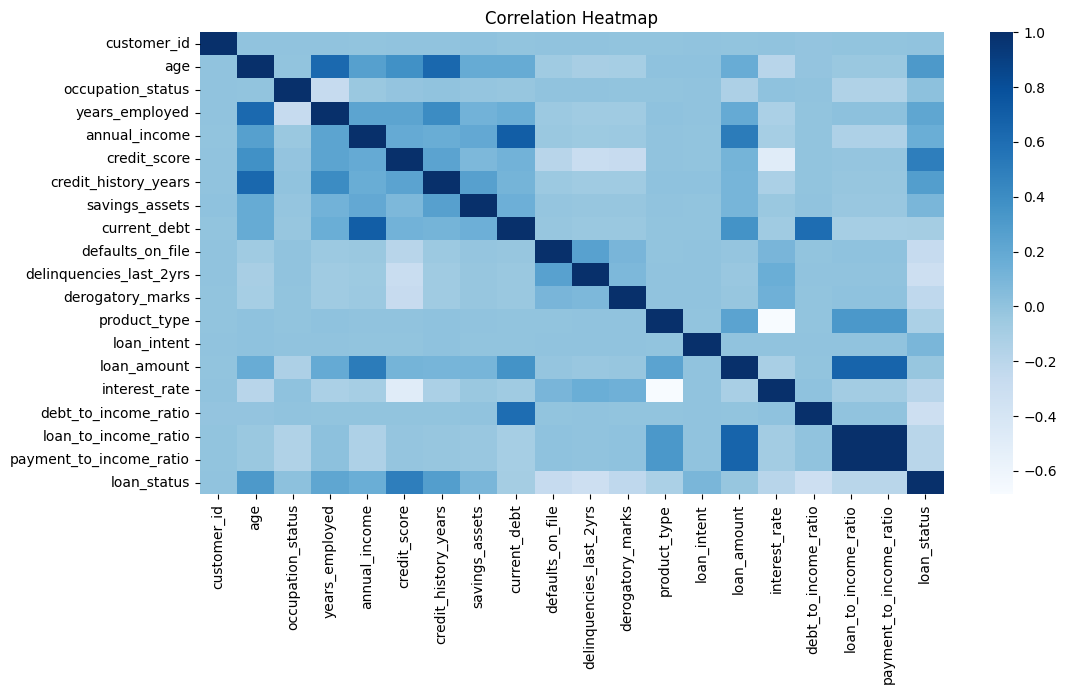

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [11]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)*100

print("Logistic Regression Accuracy:", acc_lr)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 84.64
Confusion Matrix:
 [[3675  834]
 [ 702 4789]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      4509
           1       0.85      0.87      0.86      5491

    accuracy                           0.85     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.85      0.85     10000



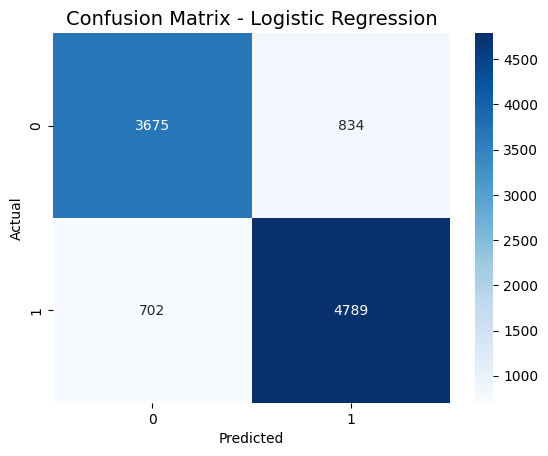

In [14]:
# --------------------------------------------
#Visualization 2E: Confusion Matrix - Logistic Regression
# --------------------------------------------
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)*100

print("KNN Accuracy:", acc_knn)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 85.54
Confusion Matrix:
 [[3606  903]
 [ 543 4948]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      4509
           1       0.85      0.90      0.87      5491

    accuracy                           0.86     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.86      0.85     10000



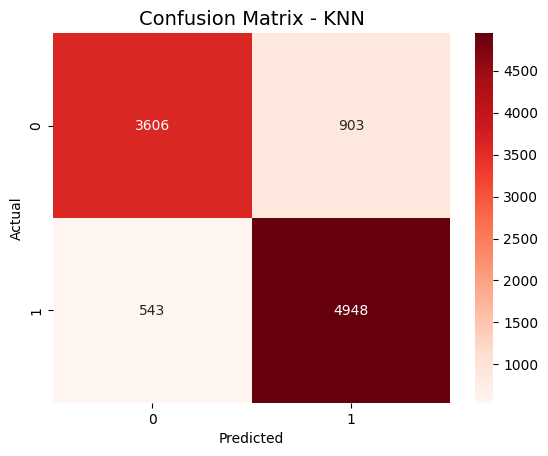

In [16]:
#Confusion Matrix - KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - KNN", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [17]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)*100

print("Decision Tree Accuracy:", acc_dt)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 87.48
Confusion Matrix:
 [[3876  633]
 [ 619 4872]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4509
           1       0.89      0.89      0.89      5491

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



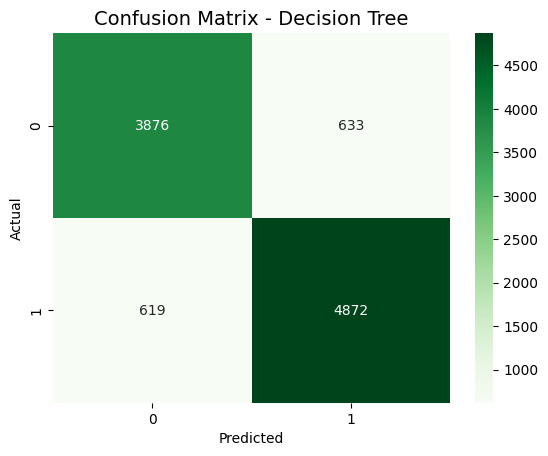

In [18]:
# Confusion Matrix - Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Decision Tree", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Create and train the model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
# Predictions
y_pred_svm = svm_model.predict(X_test)
# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)*100
print(classification_report(y_test, y_pred_svm))
print(accuracy_svm)

In [ ]:
# svm visulaizationn
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - SVM", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)
print(classification_report(y_test, y_pred_nb))

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Naive Bayes – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Accuracy Comparison
model_names = ["KNN", "Naive Bayes", "SVM", "Decision Tree", "Logistic Regression"]
accuracy_values = [accuracy_knn, accuracy_nb, accuracy_svm, accuracy_dt, accuracy_lr]

plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=accuracy_values)
plt.title("Accuracy Comparison of Classifiers")
plt.ylabel("Accuracy Score")
plt.xlabel("Classifier")
plt.show()
